# 机器学习实例：链家网北京房产成交数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_list = []
for i in range(1,8):
    try:
        data = pd.read_csv('./fangchan/lianjia{}.csv'.format(i),encoding = 'gbk')
    except:
        data = pd.read_csv('./fangchan/lianjia{}.csv'.format(i))
    finally:
        data_list.append(data)

In [3]:
len(data_list)

7

In [4]:
data = pd.concat(data_list)

In [5]:
data.head()

,cjtaoshu,mendian,cjzongjia,zhiwei,haoping,cjdanjia,cjxiaoqu,xingming,cjzhouqi,biaoqian,cjlouceng,cjshijian,congyenianxian,bankuai
0,37,红莲北里店,251.0,店经理,97% 141,43997元/平,红莲北里 3室1厅 57平,郭海龙,36,房东信赖;销售达人;带看活跃,南 北/高楼层/6层,签约时间：2015-05-24,4-5年,马连道
1,37,红莲北里店,159.0,店经理,97% 141,36969元/平,红莲南里 1室1厅 43平,郭海龙,36,房东信赖;销售达人;带看活跃,南/高楼层/7层,签约时间：2015-05-10,4-5年,马连道
2,37,红莲北里店,257.0,店经理,97% 141,39046元/平,常青藤嘉园 1室1厅 65平,郭海龙,36,房东信赖;销售达人;带看活跃,北/低楼层/16层,签约时间：2015-04-26,4-5年,马连道
3,37,红莲北里店,243.0,店经理,97% 141,41313元/平,红莲北里 2室1厅 58平,郭海龙,36,房东信赖;销售达人;带看活跃,南 北/高楼层/6层,签约时间：2015-04-04,4-5年,马连道
4,37,红莲北里店,372.5,店经理,97% 141,42053元/平,广安门外大街 3室1厅 88平,郭海龙,36,房东信赖;销售达人;带看活跃,东 南 西 北/中楼层/18层,签约时间：2015-04-01,4-5年,马连道


In [6]:
data = data[['cjdanjia','cjshijian','cjxiaoqu','bankuai']]

In [7]:
data.dropna(inplace = True)

In [8]:
data.cjdanjia = data.cjdanjia.map(lambda x: round(float(x.replace('元/平',''))/10000, 1))

In [9]:
data.cjshijian = pd.to_datetime(data.cjshijian.map(lambda x: x.split('签约时间：')[-1]))

In [10]:
data.set_index('cjshijian', inplace=True)

In [11]:
(data.cjxiaoqu.map(lambda x: len(x.split()) != 3)).sum()

3

In [12]:
data = data[data.cjxiaoqu.map(lambda x: len(x.split()) == 3)]

In [13]:
data['xiaoqu'] = data.cjxiaoqu.map(lambda x: x.split()[0])

In [14]:
data['geju'] = data.cjxiaoqu.map(lambda x: x.split()[1])

In [16]:
data['mianji'] = data.cjxiaoqu.map(lambda x: float(x.split()[2].split('平')[0]))

In [25]:
data.xiaoqu.value_counts()[:20]

北京像素北区    610
新龙城       565
远洋山水      535
北京像素南区    478
北京新天地     476
天通苑东一区    452
荣丰2008    449
芍药居北里     439
东亚上北中心    409
天通西苑三区    381
天通苑中苑     366
海特花园小区    351
天通西苑二区    324
龙华园       323
兴隆家园      318
育新花园      308
翠成馨园      307
望京新城      290
京通苑       272
永乐西区      271
Name: xiaoqu, dtype: int64

In [26]:
data1 = data[data.xiaoqu == '远洋山水']

In [30]:
data1 = data1['2015'].sort_index()

In [32]:
import matplotlib.pyplot as plt

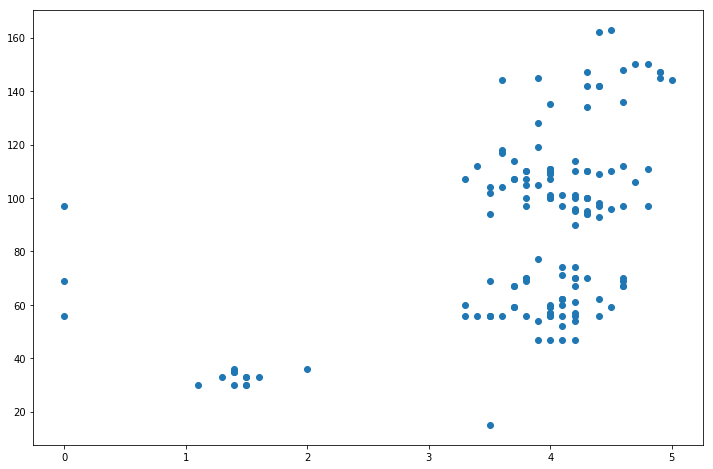

In [33]:
plt.figure(figsize = (12,8))
plt.scatter(data1.cjdanjia, data1.mianji)

In [20]:
data1 = data['2015'][['cjdanjia', 'mianji']]

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
plt.scatter(data1.cjdanjia, data1.mianji)

In [45]:
del data['cjxiaoqu']

In [47]:
data.xiaoqu.value_counts()

北京像素北区      610
新龙城         565
远洋山水        535
北京像素南区      478
北京新天地       476
天通苑东一区      452
荣丰2008      449
芍药居北里       439
东亚上北中心      409
天通西苑三区      381
天通苑中苑       366
海特花园小区      351
天通西苑二区      324
龙华园         323
兴隆家园        318
育新花园        308
翠成馨园        307
望京新城        290
京通苑         272
永乐西区        271
后现代城        270
模式口西里       265
流星花园三区      258
顺驰领海        255
青年汇佳园       255
沿海赛洛城       254
西坝河东里       253
永乐东区        251
梵谷水郡        247
天通苑北二区      247
           ... 
金科帕提欧         1
金第万科金域东郡      1
裕祺隆园          1
靛厂路6号院        1
金果胡同          1
亮甲店甲1号院       1
交大东路50号院      1
东外公馆          1
珠光御景一期        1
横三条15号        1
华源一里小区        1
联宝公寓          1
鼓楼北街3号楼       1
红松园3号院        1
纳帕尔湾          1
新建胡同          1
拱辰大街27号楼      1
西北关200号院      1
北苑南路24号院      1
新太仓一巷         1
梨园100号院       1
右安西里          1
西大望路65号院      1
左安门内大街        1
百万庄子区         1
白纸坊北里         1
三义庙南1号        1
后局大院胡同        1
新城嘉园          1
中美公寓          1
Name: xiaoqu, Length: 61

In [48]:
data1 = data[data.xiaoqu == '远洋山水']

In [81]:
data1['2015']

,cjdanjia,bankuai,xiaoqu,geju,mianji
cjshijian,,,,,
2015-01-03,4.0,鲁谷,远洋山水,2室2厅,111平
2015-01-11,3.5,鲁谷,远洋山水,1室1厅,56平
2015-01-15,3.5,鲁谷,远洋山水,2室2厅,104平
2015-01-15,4.3,玉泉路,远洋山水,3室2厅,147平
2015-01-19,4.0,鲁谷,远洋山水,2室2厅,100平
2015-01-19,4.0,鲁谷,远洋山水,2室2厅,111平
2015-01-19,4.0,鲁谷,远洋山水,2室2厅,100平
2015-01-25,3.8,鲁谷,远洋山水,2室2厅,100平
2015-01-30,4.4,鲁谷,远洋山水,3室2厅,142平


In [61]:
import matplotlib.pyplot as plt

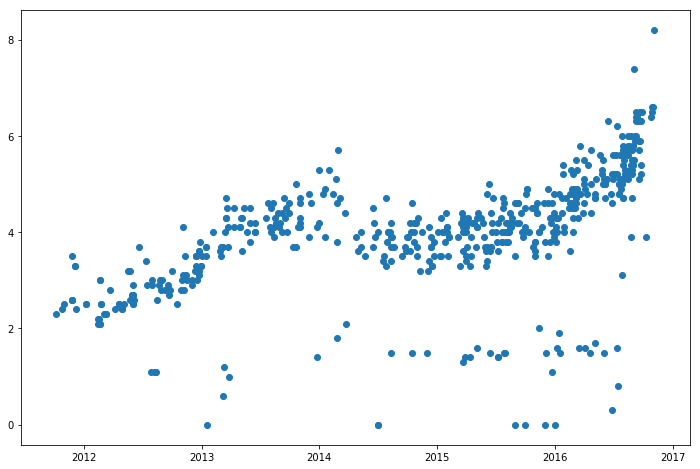

In [64]:
plt.figure(figsize = (12,8))
plt.scatter(data1.index, data1.cjdanjia)

In [73]:
from sklearn import linear_model

In [74]:
clf = linear_model.LinearRegression()

In [77]:
clf.fit(data1.cjdanjia.index.values.reshape(1, -1), data1.cjdanjia.reshape(1, -1))

C:\Users\qiqi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
clf.coef_

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [51]:
data1.sort_index(inplace = True)

C:\Users\qiqi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


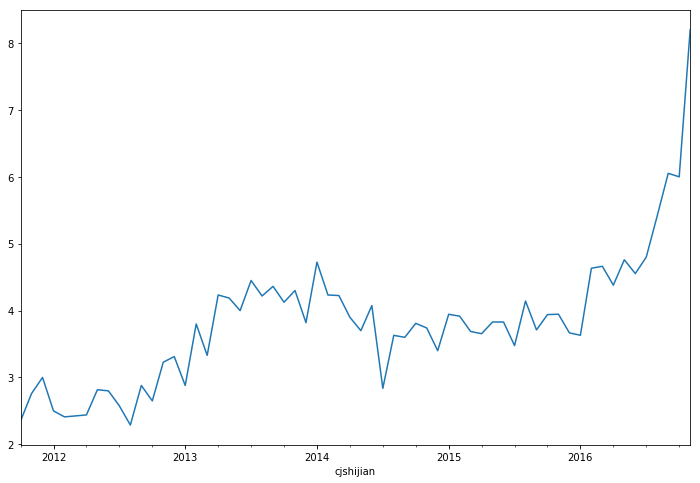

In [55]:
data1.cjdanjia.resample('M').mean().plot(figsize = (12,8))

In [56]:
data2 = data[data.xiaoqu == '新龙城']

In [58]:
data2.sort_index(inplace = True)

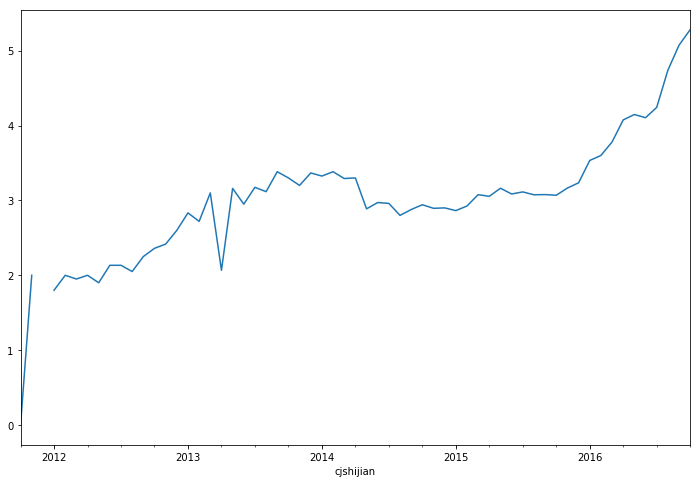

In [60]:
data2.cjdanjia.resample('M').mean().plot(figsize = (12,8))

### 读取数据

In [3]:
data1 = pd.read_csv('./fangchan/lianjia1.csv',encoding = 'gbk')

In [4]:
data1.head()

,cjtaoshu,mendian,cjzongjia,zhiwei,haoping,cjdanjia,cjxiaoqu,xingming,cjzhouqi,biaoqian,cjlouceng,cjshijian,congyenianxian,bankuai
0,37,红莲北里店,251.0,店经理,97% 141,43997元/平,红莲北里 3室1厅 57平,郭海龙,36,房东信赖;销售达人;带看活跃,南 北/高楼层/6层,签约时间：2015-05-24,4-5年,马连道
1,37,红莲北里店,159.0,店经理,97% 141,36969元/平,红莲南里 1室1厅 43平,郭海龙,36,房东信赖;销售达人;带看活跃,南/高楼层/7层,签约时间：2015-05-10,4-5年,马连道
2,37,红莲北里店,257.0,店经理,97% 141,39046元/平,常青藤嘉园 1室1厅 65平,郭海龙,36,房东信赖;销售达人;带看活跃,北/低楼层/16层,签约时间：2015-04-26,4-5年,马连道
3,37,红莲北里店,243.0,店经理,97% 141,41313元/平,红莲北里 2室1厅 58平,郭海龙,36,房东信赖;销售达人;带看活跃,南 北/高楼层/6层,签约时间：2015-04-04,4-5年,马连道
4,37,红莲北里店,372.5,店经理,97% 141,42053元/平,广安门外大街 3室1厅 88平,郭海龙,36,房东信赖;销售达人;带看活跃,东 南 西 北/中楼层/18层,签约时间：2015-04-01,4-5年,马连道


In [5]:
data2 = pd.read_csv('./fangchan/lianjia2.csv',encoding = 'gbk')

In [6]:
data3 = pd.read_csv('./fangchan/lianjia3.csv',encoding = 'utf-8')

In [7]:
data4 = pd.read_csv('./fangchan/lianjia4.csv',encoding = 'utf-8')
data5 = pd.read_csv('./fangchan/lianjia5.csv',encoding = 'utf-8')
data6 = pd.read_csv('./fangchan/lianjia6.csv',encoding = 'utf-8')
data7 = pd.read_csv('./fangchan/lianjia7.csv',encoding = 'utf-8')

### 合并数据集

In [8]:
data = pd.concat([data1,data2,data3,data4,data5,data6,data7])

In [9]:
data.describe()

,cjtaoshu,cjzongjia
count,162227.000000,162226.000000
mean,29.111923,317.481277
std,19.607250,207.472106
min,1.000000,0.000000
25%,16.000000,190.000000
50%,26.000000,266.000000
75%,38.000000,385.000000
max,186.000000,6000.000000


In [11]:
data.cjshijian = data.cjshijian.str.replace('签约时间：','')

In [13]:
data.cjshijian.sort_values()

12626    2002-06-01
23334    2003-07-31
43083    2006-01-02
51228    2006-01-02
785      2006-01-02
56230    2010-09-25
14217    2010-09-25
9986     2011-01-21
14216    2011-03-28
56229    2011-03-28
11437    2011-05-15
4083     2011-05-31
40716    2011-06-02
12315    2011-06-02
49135    2011-06-02
3084     2011-06-03
23013    2011-06-05
13023    2011-06-11
38553    2011-06-14
17284    2011-06-15
7410     2011-06-16
16023    2011-06-19
57072    2011-06-19
17159    2011-06-22
11062    2011-06-22
9215     2011-06-23
8647     2011-06-23
11061    2011-06-23
16022    2011-06-24
1135     2011-06-25
            ...    
2627     2016-11-09
40634    2016-11-09
51348    2016-11-09
28147    2016-11-09
6327     2016-11-10
47120    2016-11-10
51227    2016-11-10
3071     2016-11-10
43391    2016-11-10
51272    2016-11-10
5997     2016-11-10
51889    2016-11-10
4859     2016-11-10
3771     2016-11-10
6068     2016-11-10
396      2016-11-10
41568    2016-11-10
4866     2016-11-10
6487     2016-11-10


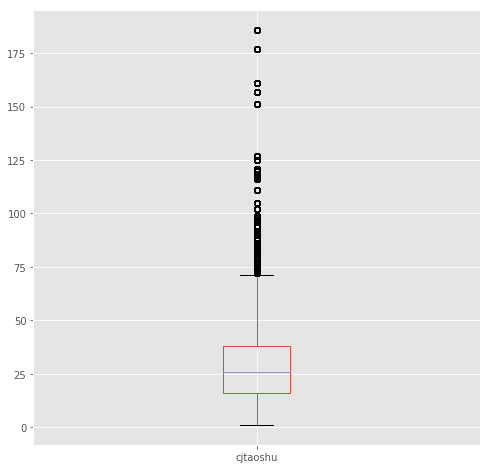

In [9]:
plt.style.use('ggplot')
data.cjtaoshu.plot.box(figsize = (8,8))

In [10]:
data.columns

Index(['cjtaoshu', 'mendian', 'cjzongjia', 'zhiwei', 'haoping', 'cjdanjia',
       'cjxiaoqu', 'xingming', 'cjzhouqi', 'biaoqian', 'cjlouceng',
       'cjshijian', 'congyenianxian', 'bankuai'],
      dtype='object')

In [11]:
data = data[['cjzongjia', 'cjdanjia', 'cjxiaoqu', 'xingming','cjlouceng','haoping','bankuai','zhiwei','congyenianxian']]

In [12]:
data['bankuai'] = data.bankuai.fillna('未知板块')

In [13]:
data = data.dropna()

In [14]:
data['cjdanjia'] = data.cjdanjia.str.replace('元/平','').astype(np.float32).map(lambda x: round(x/10000,2))

### 数据的离散化

In [15]:
bins = [0,1,2,3,4,5,6,7,8,9,10,20]

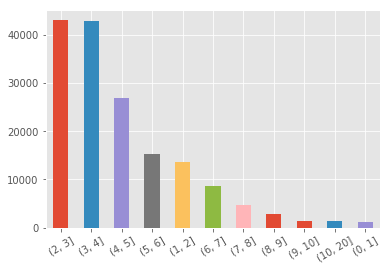

In [16]:
pd.cut(data.cjdanjia,bins).value_counts().plot.bar(rot = 30)

In [17]:
data.bankuai.value_counts()[:20]

回龙观    6023
望京     4122
北苑     3254
天通苑    3083
顺义城    2873
鲁谷     2705
广安门    2632
旧宫     2599
朝青     2575
马家堡    2572
清河     2366
德胜门    2338
梨园     2066
亚运村    2025
黄村北    1935
双桥     1910
管庄     1883
西红门    1793
苹果园    1770
杨庄     1768
Name: bankuai, dtype: int64

In [18]:
data_1 = data.groupby('bankuai')[['cjdanjia']].mean()

In [19]:
data_1.sort_values(by= 'cjdanjia',ascending = False)[:30]

,cjdanjia
bankuai,
西四,9.470000
金融街,8.206759
西单,7.401588
东四,7.110909
木樨地,6.995127
金宝街,6.970000
万柳,6.751980
月坛,6.677222
中关村,6.555035


In [20]:
data_1.columns

Index(['cjdanjia'], dtype='object')

In [21]:
def top(group,n=5):
    return group.sort_values('cjdanjia',ascending=False)[:n]

In [22]:
data.groupby('xingming').apply(top)

cjzongjia  cjdanjia            cjxiaoqu xingming  \
xingming                                                           
丁一       48245      250.0      5.43       松榆西里 2室1厅 46平       丁一   
         48246      248.0      4.14      平乐园小区 2室1厅 59平       丁一   
         48247      166.0      3.89        松榆里 1室1厅 42平       丁一   
         48251      184.0      3.67        农光里 1室1厅 50平       丁一   
         48248      181.0      3.44       农光南路 1室1厅 52平       丁一   
丁丽       26358      150.0      4.56     西潞苑小区 1室--厅 32平       丁丽   
         26353      300.0      4.08      西潞苑小区 2室1厅 73平       丁丽   
         26354      295.0      3.64        翠福园 1室1厅 81平       丁丽   
         26357      460.0      3.23    京贸国际公寓 3室2厅 142平       丁丽   
         26356      307.0      3.17      西潞苑小区 2室1厅 96平       丁丽   
丁乾浩      5834       237.0      2.57       燕京航城 2室1厅 92平      丁乾浩   
         5836        79.0      1.96    首尔甜城一期 1室--厅 40平      丁乾浩   
         5835        95.0      1.77       北欧小镇 1室1厅 53平      丁乾浩   
丁云朋      789        417.5      4.32     丰益花园东区 2室1厅 96平      丁云朋   
         790        225.0      4.16      东大街西里 2室1厅 54平      丁云朋   
         791        388.0      3.84      彩虹街区 2室2厅 101平      丁云朋   
         793        208.0      3.57      前泥洼小区 2室1厅 58平      丁云朋   
         795        205.0      3.24        东大街 2室1厅 63平      丁云朋   
丁光明      25456      365.0      6.94        主场 1室--厅 52平      丁光明   
         25458     1027.0      6.65    嘉铭桐城D区 3室2厅 154平      丁光明   
         25457      750.0      5.86    嘉铭桐城F区 3室2厅 128平      丁光明   
         25459      620.0      5.68    嘉铭桐城E区 2室2厅 109平      丁光明   
         25460      561.0      5.09    嘉铭桐城C区 3室2厅 110平      丁光明   
丁凡顺      56727      385.0      4.14      海棠湾三期 2室2厅 93平      丁凡顺   
         56726      360.0      3.86       逸秀名园 2室1厅 93平      丁凡顺   
         56728      158.0      3.33       11站 1室--厅 47平      丁凡顺   
         56730      140.0      3.23    蓝调沙龙东区 1室--厅 43平      丁凡顺   
         56729      152.0      2.85        11站 1室1厅 53平      丁凡顺   
丁向锋      33499      349.5      5.34    花家地西里一区 2室1厅 65平      丁向锋   
         3750       349.5      5.34    花家地西里一区 2室1厅 65平      丁向锋   
...                   ...       ...                 ...      ...   
龚喜全      14464     1065.0      6.33    大成郡驭风园 3室1厅 168平      龚喜全   
         14458      396.5      6.29       保利百合 1室2厅 63平      龚喜全   
         14468      550.0      5.99     大成郡若晨园 2室1厅 91平      龚喜全   
龚宸       2451       805.0      7.74     远大园二区 2室2厅 104平       龚宸   
         2453       550.0      6.41      远大园四区 2室1厅 85平       龚宸   
         2452       845.0      4.81  世纪金源国际公寓 2室2厅 175平       龚宸   
龚小芳      23120      900.0      5.60     爱这城二期 3室2厅 160平      龚小芳   
         23115      230.0      5.53      十里堡北里 1室1厅 41平      龚小芳   
         23114      560.0      5.38      城市广场 2室1厅 104平      龚小芳   
         23118      193.0      4.57      十里堡北里 1室1厅 42平      龚小芳   
         23119      495.0      4.28      朝阳无限 2室1厅 115平      龚小芳   
龚成       35498      655.0      7.62       润泽悦溪 2室1厅 86平       龚成   
         35502      435.0      6.55        华贸城 2室2厅 66平       龚成   
         35497      370.0      4.51     天通西苑二区 2室1厅 82平       龚成   
         35514      121.0      4.03  东亚奥北中心北区 1室--厅 30平       龚成   
         35490      136.0      3.68       奥北南区 1室1厅 36平       龚成   
龚振武      27769      344.0      3.70       西辛南区 3室1厅 93平      龚振武   
         27770      259.0      3.57       裕龙四区 2室1厅 72平      龚振武   
         27771      242.0      2.91       石园北区 2室1厅 83平      龚振武   
         27772      188.0      2.90       仓上小区 2室1厅 64平      龚振武   
         27776      174.0      2.87       仓上小区 1室1厅 60平      龚振武   
龚继航      45578      445.0     12.36   西黄城根45号院 1室1厅 36平      龚继航   
         45580      560.0      9.29       灵境胡同 2室1厅 60平      龚继航   
         45577      400.0      8.49   西黄城根南街一区 2室1厅 47平      龚继航   
         45579      275.0      5.23      青春无限 1室--厅 52平      龚继航   
龚雪       19726     1300.0      8.71   大西洋新城F区 3室2厅 149平       龚雪   
    

In [23]:
data['xiaoqu'] = data.cjxiaoqu.map(lambda x:x.split()[0])

In [24]:
data.groupby('xingming')['xiaoqu'].unique()

xingming
丁一             [松榆西里, 平乐园小区, 松榆里, 农光南路, 松榆东里, 武圣西里, 农光里]
丁丽                    [西潞苑小区, 翠福园, 至善家园, 京贸国际公寓, 金地格林格林]
丁乾浩                                 [燕京航城, 北欧小镇, 首尔甜城一期]
丁云朋            [丰益花园东区, 东大街西里, 彩虹街区, 丰益花园西区, 前泥洼小区, 东大街]
丁光明    [嘉铭桐城B区, 主场, 嘉铭桐城F区, 嘉铭桐城D区, 嘉铭桐城E区, 嘉铭桐城C区, 嘉...
丁凡顺    [公庄小区, 云景西里南区, 时尚街区西区, 日光清城, 桃花岛, 久居雅园, 梨园小镇, ...
丁向锋            [金蝉南里, 花家地西里一区, 星源国际, 马南里, 南湖渠西里, 南湖东园一区]
丁壮     [双榆树东里, 双榆树西里, 双榆树北里, 双榆树北路, 知春路59号院, 青年公寓, 知春...
丁学峰    [北京经开荣京道, 灵秀山庄, 米兰天空, 星岛嘉园, 林肯公园二期, 燕景佳园, 梅园小区...
丁少林    [澜花语岸, 新潮嘉园三期, 四海公寓, 珠江国际城八区, 潞潮佳苑, 东潞苑, 新潮嘉园一...
丁康康                [青秀城, 小南庄社区, 百环家园, 巴克摩界, 王公坟社区, 三义庙北]
丁建宝                                             [龙锦苑东四区]
丁旭     [橡树湾, 领秀慧谷C区, 上地东里, 天通西苑三区, 清上园, 上地西里, 清秀阁, 宜品...
丁林冲    [新华街六里, 新华街三里, 金丰园, 宝隆温泉公寓, 宝丰大厦, 福顺里, 富丰园小区, ...
丁海军    [中关村, 东南小区, 青云北区, 空间物理所小区, 艾瑟顿, 富力桃园C区, 知本时代, ...
丁涛涛         [兴政西里, 三合南里, 海子角东里, 富强东里, 黄村西里, 海子角西里, 林校北里]
丁炜          [康家园, 朝阳无限, 天天朝阳, 兴隆家园, 甘露园南里, 丽景馨居, 南太平庄北巷]
丁秋枫                   

In [25]:
def jjc(group):
    return group.xingming.value_counts()[:5]

In [26]:
data.groupby('xiaoqu').apply(jjc)[:30]

xiaoqu      
--室--厅   赵海阳     2
         张泽兴     1
10AM新坐标  武晓林    27
         王晓     23
         朱勇      9
         段晓龙     5
         藏全杰     3
10号名邸    李昆      2
         孙代君     2
         王楠竹     1
         赵勇      1
         张杨      1
11站      王赛      4
         王昭举     4
         黄灿      4
         郭晓爽     4
         左金林     3
17号旁门    周明志     1
         邹立星     1
198别墅区   张金灵     3
         孟超      1
         徐静      1
621小区    吴艳彬     1
         马宁      1
         陈德慧     1
         马同胜     1
         尚荣华     1
701宿舍    刘绘娟     1
         米九菊     1
7克拉      聂盟     12
Name: xingming, dtype: int64

In [27]:
data['cjlouceng'] = data.cjlouceng.str.split('/').map(lambda x:x[1])

In [28]:
data.pivot_table('cjdanjia',index = 'xiaoqu',columns = 'cjlouceng',aggfunc = 'mean')[:20]

cjlouceng,,中楼层,低楼层,地下室,未知,高楼层
xiaoqu,,,,,,
--室--厅,2.263333,NaN,NaN,NaN,NaN,NaN
10AM新坐标,NaN,4.079538,3.976207,NaN,NaN,3.512400
10号名邸,NaN,4.423333,4.187500,NaN,NaN,4.930000
11站,NaN,2.459412,2.414000,NaN,NaN,3.042174
17号旁门,NaN,NaN,4.750000,NaN,NaN,3.700000
198别墅区,NaN,NaN,2.558000,NaN,NaN,NaN
621小区,NaN,4.800000,4.170000,NaN,NaN,5.074000
701宿舍,NaN,2.170000,2.360000,NaN,NaN,NaN
7克拉,NaN,3.888816,3.907568,NaN,NaN,4.380370


In [29]:
data.groupby(['xiaoqu','cjlouceng'])['cjdanjia'].mean().unstack()

cjlouceng,,中楼层,低楼层,地下室,未知,高楼层
xiaoqu,,,,,,
--室--厅,2.263333,NaN,NaN,NaN,NaN,NaN
10AM新坐标,NaN,4.079538,3.976207,NaN,NaN,3.512400
10号名邸,NaN,4.423333,4.187500,NaN,NaN,4.930000
11站,NaN,2.459412,2.414000,NaN,NaN,3.042174
17号旁门,NaN,NaN,4.750000,NaN,NaN,3.700000
198别墅区,NaN,NaN,2.558000,NaN,NaN,NaN
621小区,NaN,4.800000,4.170000,NaN,NaN,5.074000
701宿舍,NaN,2.170000,2.360000,NaN,NaN,NaN
7克拉,NaN,3.888816,3.907568,NaN,NaN,4.380370


In [30]:
data1 = data.pivot_table('cjzongjia',index = 'xingming',columns = 'congyenianxian',aggfunc = 'sum')

In [31]:
data1.head()

congyenianxian,1-2年,2-3年,3-4年,4-5年,5年以上,<1年
xingming,,,,,,
丁一,NaN,NaN,1760.0,NaN,NaN,NaN
丁丽,NaN,NaN,NaN,NaN,3115.0,NaN
丁乾浩,NaN,NaN,NaN,NaN,NaN,411.0
丁云朋,1950.0,NaN,NaN,NaN,NaN,NaN
丁光明,4284.0,NaN,NaN,NaN,NaN,NaN


In [32]:
(data1.sum(1) > 10000).sum()   #成交量大于一亿

1524

In [33]:
data1 = data1[data1.sum(1) > 10000]

In [34]:
data1.head()

congyenianxian,1-2年,2-3年,3-4年,4-5年,5年以上,<1年
xingming,,,,,,
丁林冲,NaN,NaN,NaN,23269.8,NaN,NaN
丁海军,NaN,NaN,NaN,NaN,18387.80,NaN
丛艳菊,NaN,NaN,NaN,25195.5,NaN,NaN
丛龙均,NaN,NaN,NaN,NaN,12055.58,NaN
乔俊萍,NaN,NaN,NaN,NaN,16466.40,NaN


In [35]:
data1.dropna(how = 'all',axis = 1,inplace = True)

In [36]:
data1.head()

congyenianxian,1-2年,2-3年,3-4年,4-5年,5年以上,<1年
xingming,,,,,,
丁林冲,NaN,NaN,NaN,23269.8,NaN,NaN
丁海军,NaN,NaN,NaN,NaN,18387.80,NaN
丛艳菊,NaN,NaN,NaN,25195.5,NaN,NaN
丛龙均,NaN,NaN,NaN,NaN,12055.58,NaN
乔俊萍,NaN,NaN,NaN,NaN,16466.40,NaN


In [37]:
data1.fillna(0,inplace = True)

In [38]:
data1.head()

congyenianxian,1-2年,2-3年,3-4年,4-5年,5年以上,<1年
xingming,,,,,,
丁林冲,0.0,0.0,0.0,23269.8,0.00,0.0
丁海军,0.0,0.0,0.0,0.0,18387.80,0.0
丛艳菊,0.0,0.0,0.0,25195.5,0.00,0.0
丛龙均,0.0,0.0,0.0,0.0,12055.58,0.0
乔俊萍,0.0,0.0,0.0,0.0,16466.40,0.0


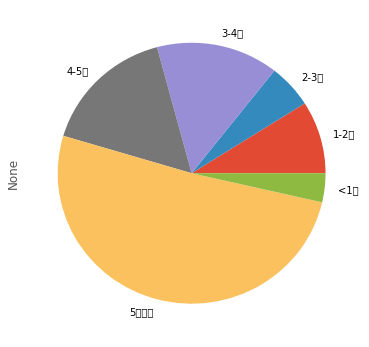

In [39]:
#plt.rcParams['font.sans-serif']=['STSong'] #用来正常显示中文标签
s_1 = (data1>0).sum(0)
s_1.plot.pie(figsize = (6,6))

In [40]:
s_all = data.drop_duplicates(['xingming','congyenianxian']).congyenianxian.value_counts() #data.congyenianxian.value_counts()
s_all

5年以上    2483
1-2年    2050
<1年     1333
3-4年    1254
4-5年     944
2-3年     713
Name: congyenianxian, dtype: int64

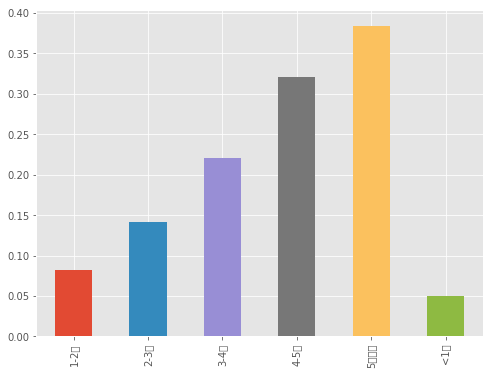

In [41]:
(s_1/s_all).plot.bar(figsize = (8,6))

In [42]:
data[data.xingming.isin(data1.index)].cjdanjia.mean()

4.115830635012706

In [43]:
data[~data.xingming.isin(data1.index)].cjdanjia.mean()

3.6786283509830007

In [44]:
data = data[data.haoping.str.contains('%')]

In [45]:
data['pingjiashu'] = data.haoping.map(lambda x:int(x.split()[1]))

In [46]:
data['haoping'] = data.haoping.map(lambda x :int(x.split()[0].replace('%','')))

In [47]:
data = data[data.pingjiashu > 50]

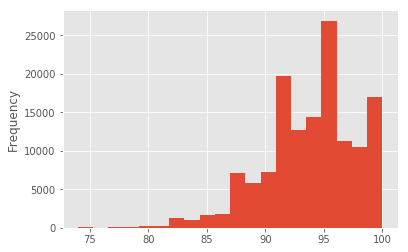

In [48]:
data.haoping.plot.hist(bins = 20)

In [49]:
data[data.xingming.isin(data1.index)].haoping.mean()

93.40582385063608

In [50]:
data[~data.xingming.isin(data1.index)].haoping.mean()

94.28022037670303

In [53]:
data.zhiwei.unique()

array(['店经理', '经纪人', '高级经纪人', '高级店经理', '资深店经理', '资深经纪人', '助理经纪人'],
      dtype=object)

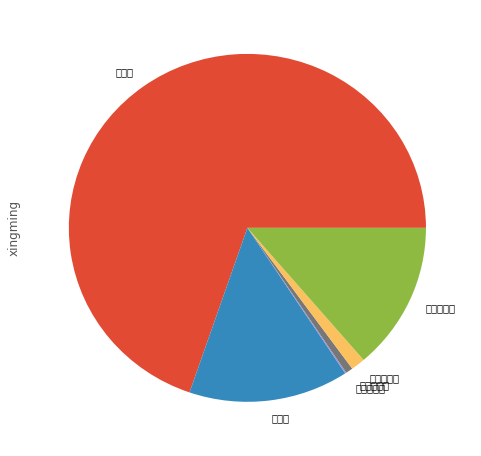

In [56]:
data[data.xingming.isin(data1.index)].groupby('zhiwei')['xingming'].size().plot.pie(figsize=(8,8))

In [51]:
pd.crosstab(data.xiaoqu,data.xingming)

xingming,丁一,丁丽,丁光明,丁凡顺,丁学峰,丁少林,丁康康,丁旭,丁林冲,丁海军,...,龙腾,龙见水,龙超,龙运江,龚喜全,龚小芳,龚成,龚振武,龚继航,龚雪
xiaoqu,,,,,,,,,,,,,,,,,,,,,
--室--厅,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10AM新坐标,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10号名邸,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11站,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17号旁门,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198别墅区,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
621小区,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
701宿舍,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7克拉,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
